In [1]:
from deap import benchmarks
from numpy import random as rnd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from functools import partial
from matplotlib import ticker
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def function_drawing(func, limit):
    def function_arg0(selected_function, sol):
        return selected_function(sol)[0]

    function_for_drawing = partial(function_arg0, func)
    fig = plt.figure()
    ax = Axes3D(fig, azim = 0, elev = 40)
    X = np.arange(limit[0], limit[1], 0.5)
    Y = np.arange(limit[0], limit[1], 0.5)
    X, Y = np.meshgrid(X, Y)
    Z = np.fromiter(map(function_for_drawing, zip(X.flat,Y.flat)), dtype=np.float, count=X.shape[0]*X.shape[1]).reshape(X.shape)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

rosenbrock


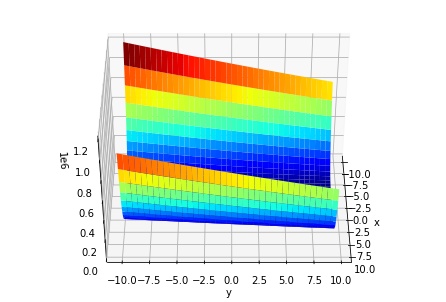

rastrigin


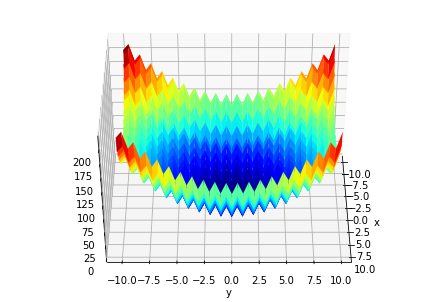

ackley


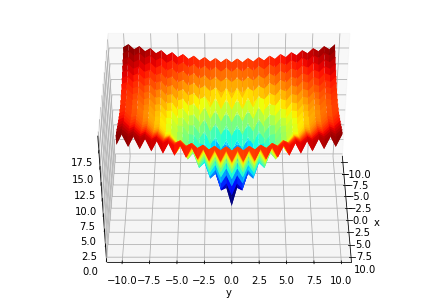

In [3]:
limit = [-10, 10]
n_gen = 100
print('rosenbrock')
function_drawing(benchmarks.rosenbrock, limit)
print('rastrigin')
function_drawing(benchmarks.rastrigin, limit)
print('ackley')
function_drawing(benchmarks.ackley, limit)

In [4]:
def draw_problems(n_evals, conv_vals):
    fig, axs = plt.subplots(1, 3, figsize=(16, 5))
    fig.suptitle("Convergence")
    axs[0].set_title('Rosenbrock')
    axs[0].plot(n_evals, conv_vals[0], "--")
    axs[0].set_yscale('log')
    axs[0].set_xlabel('generation')
    axs[1].set_title('Ackley')
    axs[1].plot(n_evals, conv_vals[1], "--")
    axs[1].set_yscale('log')
    axs[1].set_xlabel('generation')
    axs[2].set_title('Rastrigin')
    axs[2].plot(n_evals, conv_vals[2], "--")
    axs[2].set_yscale('log')
    axs[2].set_xlabel('generation')

In [5]:
def draw_points_on_functions(points_list, limit = limit):
    def function_arg0(selected_function, sol):
        return selected_function(sol)[0]
    
    funcs = [benchmarks.rosenbrock, benchmarks.ackley, benchmarks.rastrigin]
    fig, axs = plt.subplots(1, 3, figsize=(16, 5))
    for i in range(3):
        function_for_drawing = partial(function_arg0, funcs[i])
        X = np.arange(limit[0], limit[1], 0.5)
        Y = np.arange(limit[0], limit[1], 0.5)
        X, Y = np.meshgrid(X, Y)
        Z = np.fromiter(map(function_for_drawing, zip(X.flat,Y.flat)), dtype=np.float, count=X.shape[0]*X.shape[1]).reshape(X.shape)
        axs[i].contourf(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.2)
        axs[i].plot(*points_list[i], 'r*', markersize=10)
        axs[i].set_xlabel("x")
        axs[i].set_ylabel("y")

In [6]:
def run(algorithm, problems):
    conv_vals = []
    results_points = []
    for problem in problems:
        start_time = time.time()
        res = minimize(problem,
                       algorithm,
                       termination=('n_gen', n_gen),
                       seed=1,
                       save_history=True)
        print("--- %s seconds ---" % (time.time() - start_time))
        print(problem)
        print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))
        print()
        opt = np.array([e.opt[0].F for e in res.history])
        conv_vals.append(opt)
        results_points.append(res.X)
    
    n_evals = np.array([i for i in range(len(res.history))])
    return n_evals, conv_vals, results_points

--- 0.8851034641265869 seconds ---
# name: Rosenbrock
# n_var: 2
# n_obj: 1
# n_constr: 0

Best solution found: 
X = [1.01889889 1.03807699]
F = [0.00035778]

--- 0.8078410625457764 seconds ---
# name: Ackley
# n_var: 2
# n_obj: 1
# n_constr: 0

Best solution found: 
X = [-6.62244137e-07 -1.04572622e-06]
F = [3.50102424e-06]

--- 0.8477320671081543 seconds ---
# name: Rastrigin
# n_var: 2
# n_obj: 1
# n_constr: 0

Best solution found: 
X = [1.45207040e-05 2.49185522e-05]
F = [1.65019578e-07]



<ipython-input-5-e60555c7c715>:13: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth'
  axs[i].contourf(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.2)


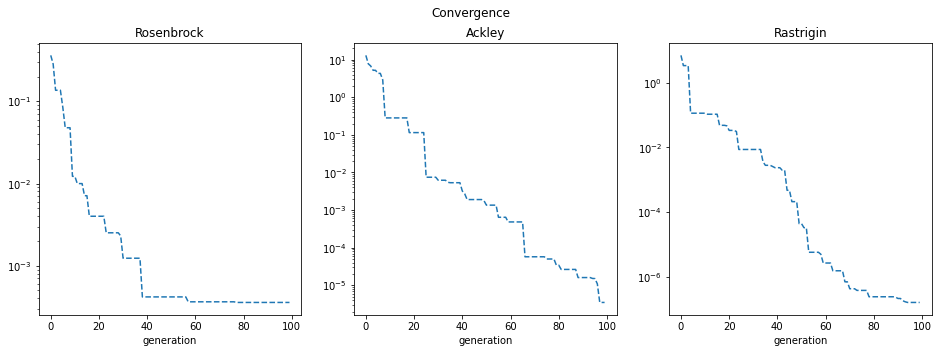

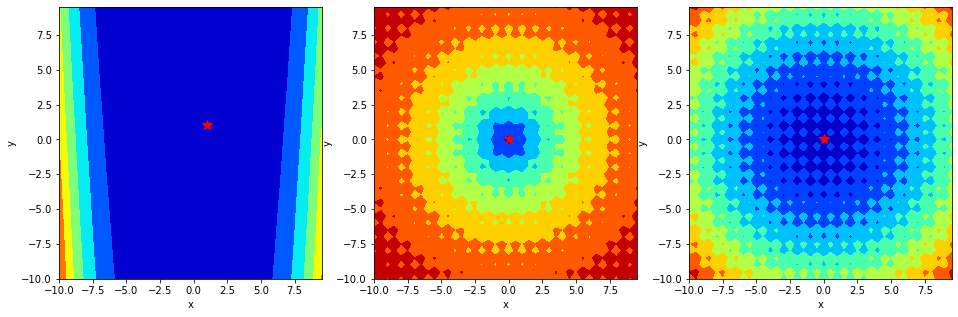

In [7]:
from pymoo.algorithms.so_genetic_algorithm import GA
from pymoo.factory import get_problem
from pymoo.optimize import minimize

problems = [get_problem("Rosenbrock"), get_problem("Ackley"), get_problem("Rastrigin")]
# Ackley Rastrigin Rosenbrock

algorithm = GA(
    pop_size=100,
    eliminate_duplicates=True)
    
n_evals, conv_vals, results_points = run(algorithm, problems)

draw_problems(n_evals, conv_vals)
draw_points_on_functions(results_points)

--- 1.331493616104126 seconds ---
# name: Rosenbrock
# n_var: 2
# n_obj: 1
# n_constr: 0

Best solution found: 
X = [0.99568728 0.9914    ]
F = [1.86042212e-05]

--- 1.0352842807769775 seconds ---
# name: Ackley
# n_var: 2
# n_obj: 1
# n_constr: 0

Best solution found: 
X = [5.23345054e-05 8.37699766e-06]
F = [0.00014998]

--- 1.1170144081115723 seconds ---
# name: Rastrigin
# n_var: 2
# n_obj: 1
# n_constr: 0

Best solution found: 
X = [8.54509902e-06 2.03867619e-06]
F = [1.53108957e-08]



<ipython-input-5-e60555c7c715>:13: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth'
  axs[i].contourf(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.2)


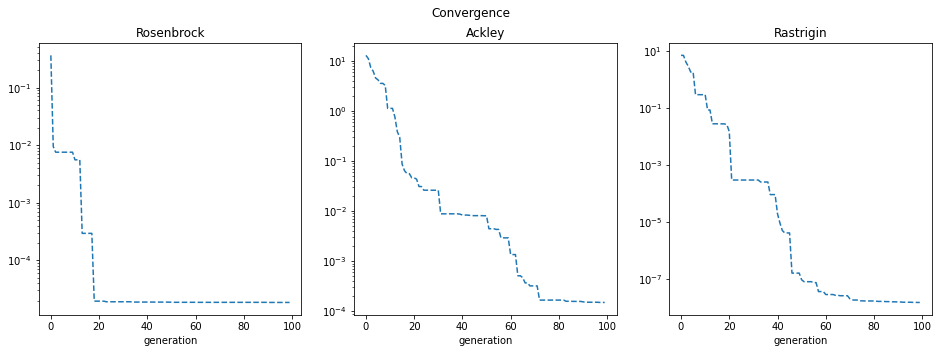

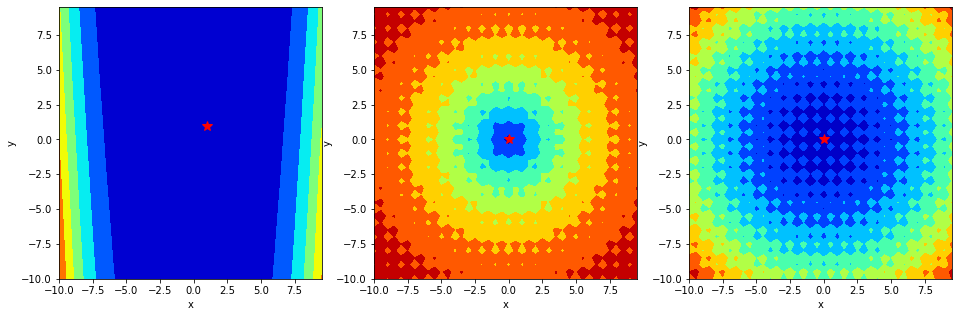

In [8]:
from pymoo.algorithms.nsga2 import NSGA2
problem = get_problem("Rosenbrock")
# Ackley Rastrigin Rosenbrock

algorithm = NSGA2(
    pop_size=100,
    eliminate_duplicates=True)

n_evals, conv_vals, results_points = run(algorithm, problems)

draw_problems(n_evals, conv_vals)
draw_points_on_functions(results_points)

In [9]:
dir(algorithm)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_each_iteration',
 '_finalize',
 '_initialize',
 '_next',
 '_set_optimum',
 '_solve',
 'callback',
 'data',
 'default_termination',
 'display',
 'eliminate_duplicates',
 'evaluator',
 'finalize',
 'has_next',
 'has_terminated',
 'history',
 'initialization',
 'initialize',
 'is_initialized',
 'mating',
 'min_infeas_pop_size',
 'n_gen',
 'n_offsprings',
 'next',
 'off',
 'opt',
 'pf',
 'pop',
 'pop_size',
 'problem',
 'repair',
 'result',
 'return_least_infeasible',
 'save_history',
 'seed',
 'setup',
 'solve',
 'start_time',
 'survival',
 'termination',
 'tournament_type',
 'verbose']

In [10]:
algorithm.has_terminated is None

True

--- 0.9685525894165039 seconds ---
# name: Rosenbrock
# n_var: 2
# n_obj: 1
# n_constr: 0

Best solution found: 
X = [0.97889417 0.9582085 ]
F = [0.00044552]

--- 0.9764063358306885 seconds ---
# name: Ackley
# n_var: 2
# n_obj: 1
# n_constr: 0

Best solution found: 
X = [-0.00295122 -0.0037004 ]
F = [0.01398381]

--- 0.9674217700958252 seconds ---
# name: Rastrigin
# n_var: 2
# n_obj: 1
# n_constr: 0

Best solution found: 
X = [-6.83870106e-05 -1.28060390e-04]
F = [4.18136042e-06]



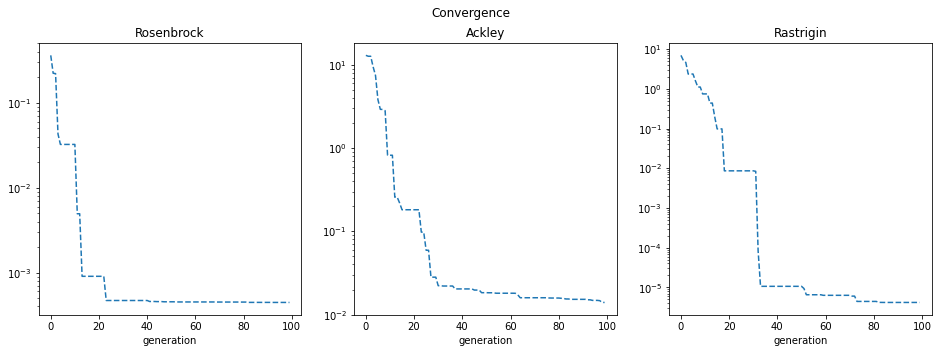

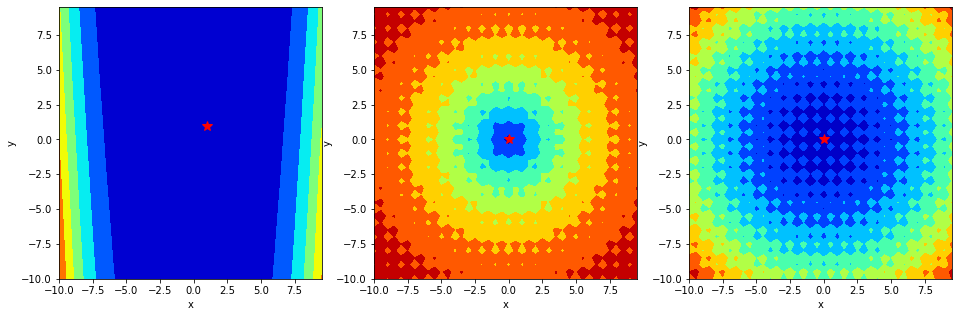

In [11]:
from pymoo.algorithms.nsga3 import NSGA3
from pymoo.factory import get_problem, get_reference_directions
from pymoo.optimize import minimize

ref_dirs = get_reference_directions("das-dennis", 1, n_partitions=12)

# create the algorithm object
algorithm = NSGA3(pop_size=92,
                  ref_dirs=ref_dirs)


n_evals, conv_vals, results_points = run(algorithm, problems)

draw_problems(n_evals, conv_vals)
draw_points_on_functions(results_points)

--- 0.9504635334014893 seconds ---
# name: Rosenbrock
# n_var: 2
# n_obj: 1
# n_constr: 0

Best solution found: 
X = [1.00150593 1.00305706]
F = [2.45217013e-06]

--- 1.1718363761901855 seconds ---
# name: Ackley
# n_var: 2
# n_obj: 1
# n_constr: 0

Best solution found: 
X = [7.2700540e-09 2.5078046e-07]
F = [7.09613922e-07]

--- 1.026257038116455 seconds ---
# name: Rastrigin
# n_var: 2
# n_obj: 1
# n_constr: 0

Best solution found: 
X = [-1.49202038e-07  4.17253461e-07]
F = [3.89590582e-11]



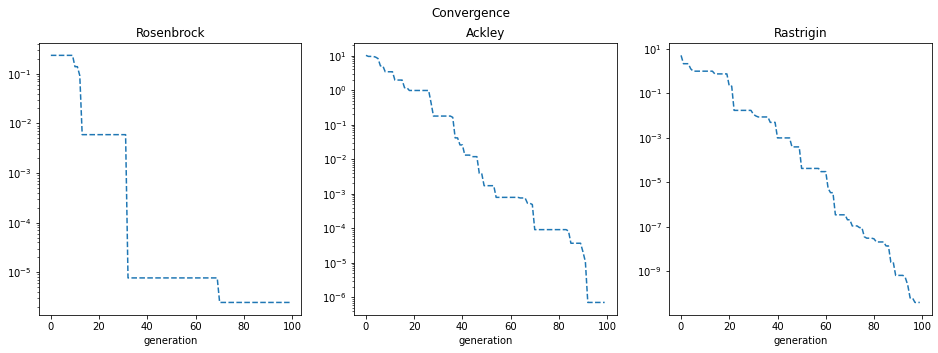

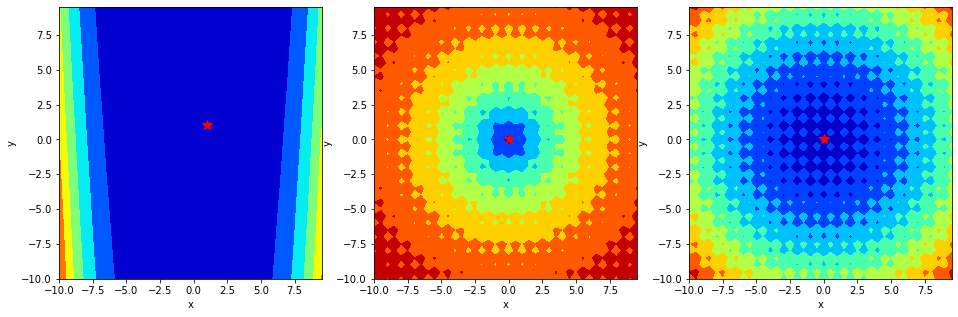

In [12]:
from pymoo.algorithms.so_de import DE
from pymoo.operators.sampling.latin_hypercube_sampling import LatinHypercubeSampling

algorithm = DE(
    pop_size=100,
    sampling=LatinHypercubeSampling(iterations=100, criterion="maxmin"),
    variant="DE/rand/1/bin",
    CR=0.5,
    F=0.3,
    dither="vector",
    jitter=False
)

n_evals, conv_vals, results_points = run(algorithm, problems)

draw_problems(n_evals, conv_vals)
draw_points_on_functions(results_points)

--- 0.10073089599609375 seconds ---
# name: Rosenbrock
# n_var: 2
# n_obj: 1
# n_constr: 0

Best solution found: 
X = [1.00004403 1.00008976]
F = [2.22441285e-09]

--- 0.07783126831054688 seconds ---
# name: Ackley
# n_var: 2
# n_obj: 1
# n_constr: 0

Best solution found: 
X = [5.46472246e-10 3.94419341e-10]
F = [1.90619831e-09]

--- 0.073760986328125 seconds ---
# name: Rastrigin
# n_var: 2
# n_obj: 1
# n_constr: 0

Best solution found: 
X = [1.98990694e+00 1.23224386e-07]
F = [3.9798312]



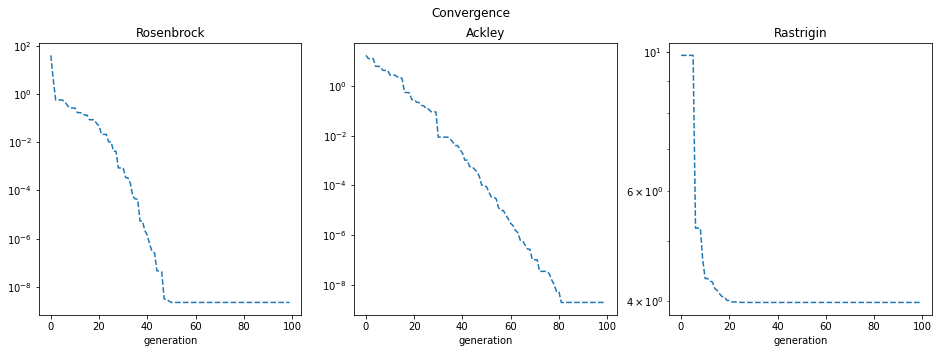

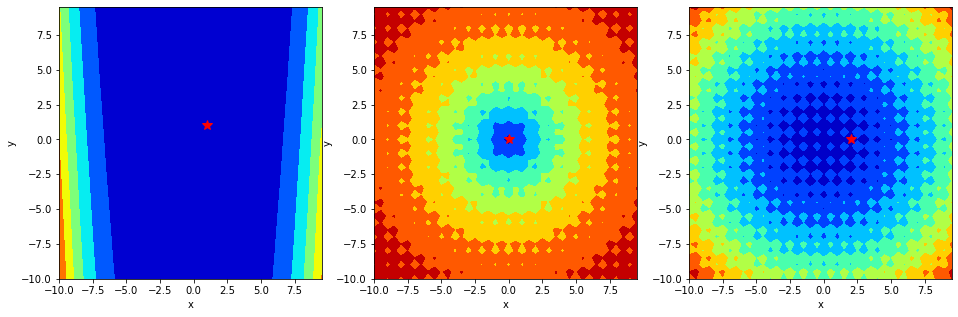

In [18]:
from pymoo.algorithms.so_nelder_mead import NelderMead
from pymoo.factory import get_problem
from pymoo.optimize import minimize

algorithm = NelderMead()

n_evals, conv_vals, results_points = run(algorithm, problems)

draw_problems(n_evals, conv_vals)
draw_points_on_functions(results_points)

In [19]:
conv_valsa

[array([[4.03549927e+01],
        [3.97781890e+00],
        [5.67686257e-01],
        [5.67686257e-01],
        [5.67686257e-01],
        [5.51571565e-01],
        [4.49019016e-01],
        [3.23897898e-01],
        [2.62998211e-01],
        [2.62998211e-01],
        [2.62998211e-01],
        [1.68787895e-01],
        [1.68787895e-01],
        [1.64120080e-01],
        [1.33307929e-01],
        [1.33307929e-01],
        [8.57711951e-02],
        [8.57711951e-02],
        [8.57711951e-02],
        [5.94048144e-02],
        [4.74163501e-02],
        [2.11956099e-02],
        [2.11956099e-02],
        [2.11956099e-02],
        [1.02930743e-02],
        [1.02930743e-02],
        [4.21523688e-03],
        [4.21523688e-03],
        [8.56661678e-04],
        [8.56661678e-04],
        [8.56661678e-04],
        [3.41293406e-04],
        [3.28434324e-04],
        [1.92845826e-04],
        [5.64316866e-05],
        [4.41365316e-05],
        [4.28924042e-05],
        [5.28168559e-06],
        [5.2